In [22]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

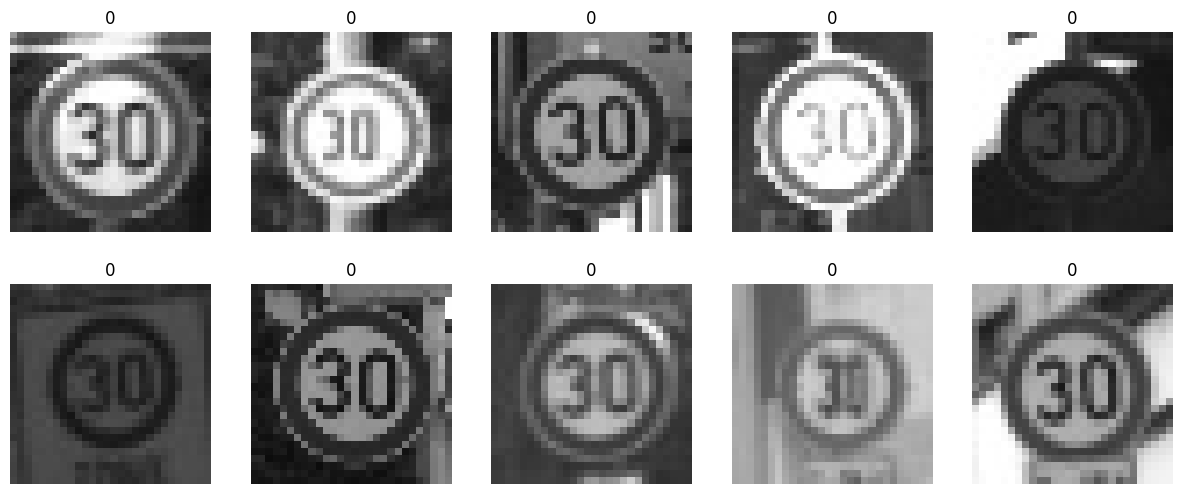

In [23]:
folder = 'data/subset_homework'

# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

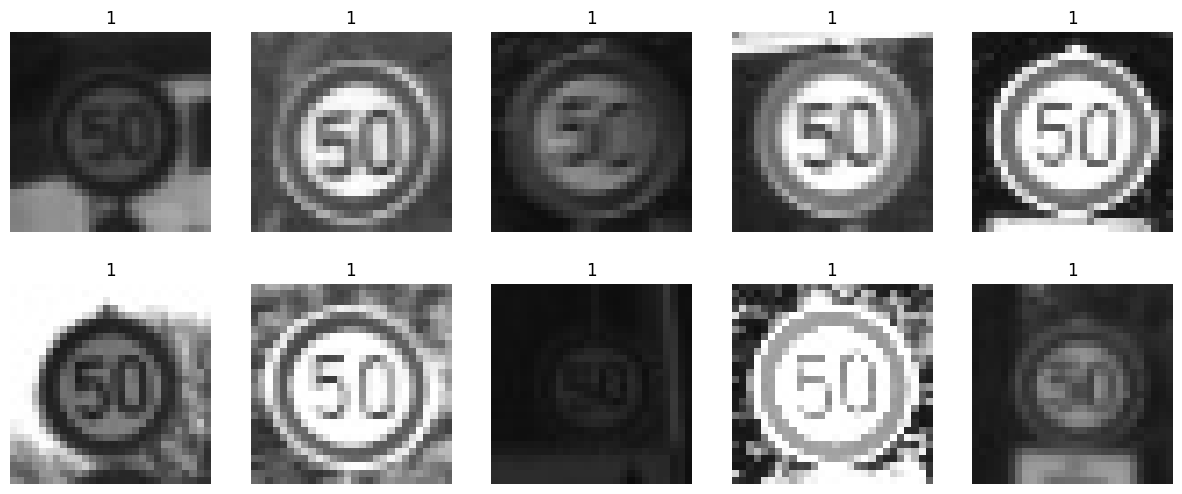

In [24]:
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [25]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 2220
Num samples class_1 2250


In [26]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4470, 28, 28)
Labels (4470,)


In [27]:
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 0.013484001159667969


Before the training, let's again have a look at some raqndom samples from our dataset.

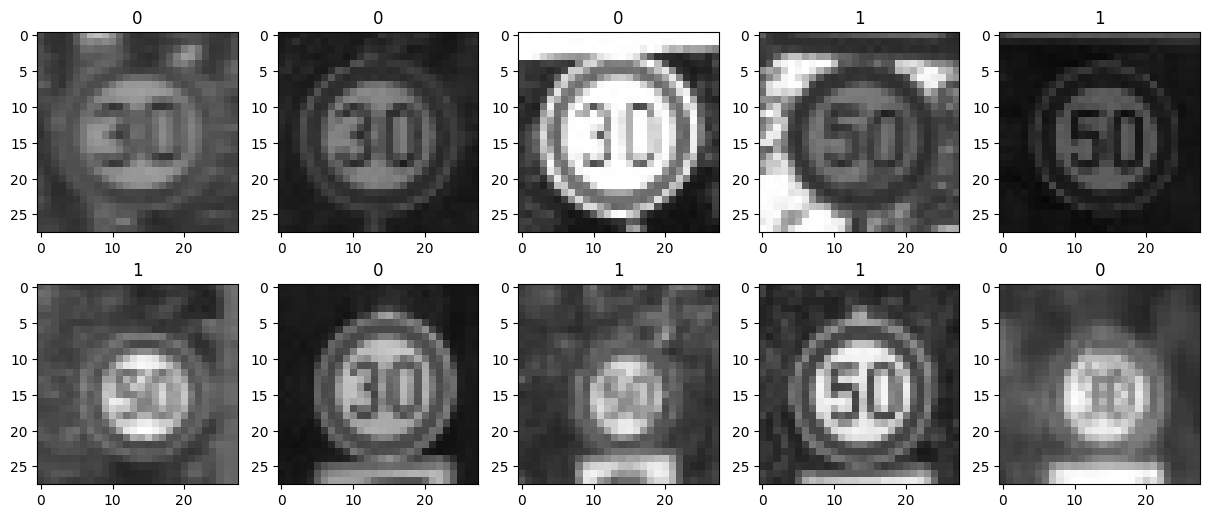

In [28]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):    
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])

In [40]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

In [56]:
inputs = Input(shape=(pixels.shape[1],))
outputs = Dense(1, activation="linear")(inputs)
model = Model(inputs, outputs)

model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

And let's train :-)

In [70]:
history = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 0.0824
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0773
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0844
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0822
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 0.0818
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - loss: 0.0753
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 0.0738
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 0.0744
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - loss: 0.0778
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - loss: 0.0769


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

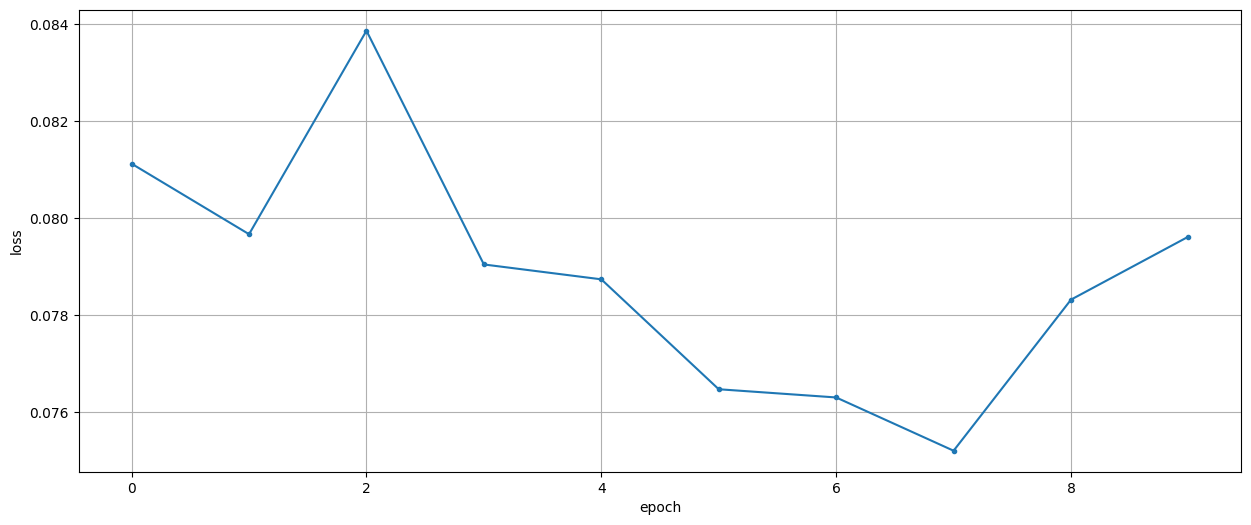

In [71]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

In [73]:
idx = 50
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[0.13303056]] 0


In [74]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step


In [75]:
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

Accuracy 0.9686800894854586


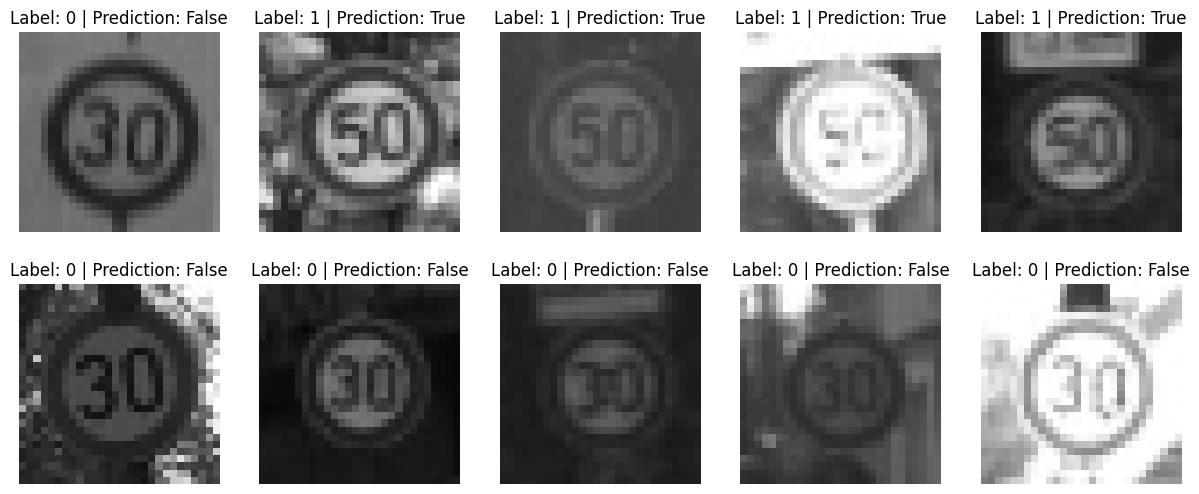

In [76]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)): 
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)

Now we try another Dense and more levels

In [82]:
inputs = Input(shape=(pixels.shape[1],))
outputs = Dense(10, activation="relu")(inputs)
outputs = Dense(1, activation="linear")(outputs)
model = Model(inputs, outputs)

model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,861 (30.71 KB)

 Trainable params: 7,861 (30.71 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

In [84]:
history = model.fit(pixels, labels, epochs=30, batch_size=32)

Epoch 1/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 768us/step - loss: 0.3087
Epoch 2/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 0.2122
Epoch 3/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 0.1593
Epoch 4/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 0.1280
Epoch 5/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 0.1053
Epoch 6/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 0.0997
Epoch 7/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 0.0901
Epoch 8/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 0.0822
Epoch 9/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - loss: 0.0818
Epoch 10/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 0.0827
Epoch 11/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - loss: 0.0755
Epoch 12/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - loss: 0.0776
Epoch 13/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 0.0714
Epoch 14/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 0.0682
Epoch 15/30
140/140 ━━━━━━━━━

(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

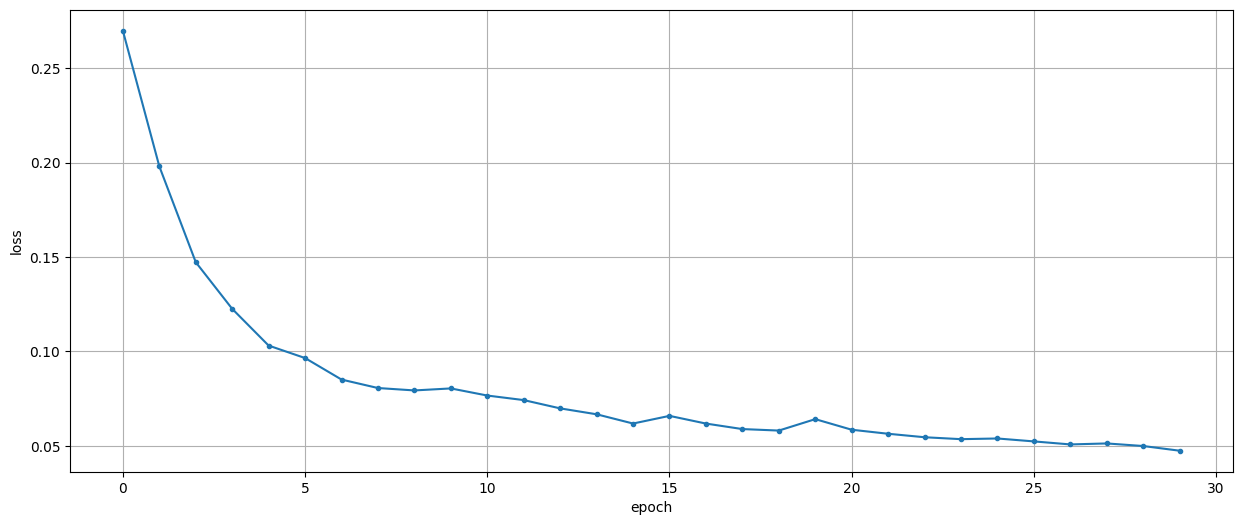

In [85]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

I will try even more neurons now

In [89]:
inputs = Input(shape=(pixels.shape[1],))
outputs = Dense(50, activation="relu")(inputs)
outputs = Dense(1, activation="linear")(outputs)
model = Model(inputs, outputs)

model.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,301 (153.52 KB)

 Trainable params: 39,301 (153.52 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')
history = model.fit(pixels, labels, epochs=30, batch_size=32)

Epoch 1/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4772  
Epoch 2/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 0.1774
Epoch 3/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - loss: 0.1365
Epoch 4/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - loss: 0.1149
Epoch 5/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 0.0960
Epoch 6/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - loss: 0.0919
Epoch 7/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - loss: 0.0788
Epoch 8/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - loss: 0.0857
Epoch 9/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 0.0822
Epoch 10/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - loss: 0.0696
Epoch 11/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 0.0673
Epoch 12/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - loss: 0.0676
Epoch 13/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - loss: 0.0768
Epoch 14/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: 0.0644
Epoch 15/30
140/140 ━━━━━━━━━

(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

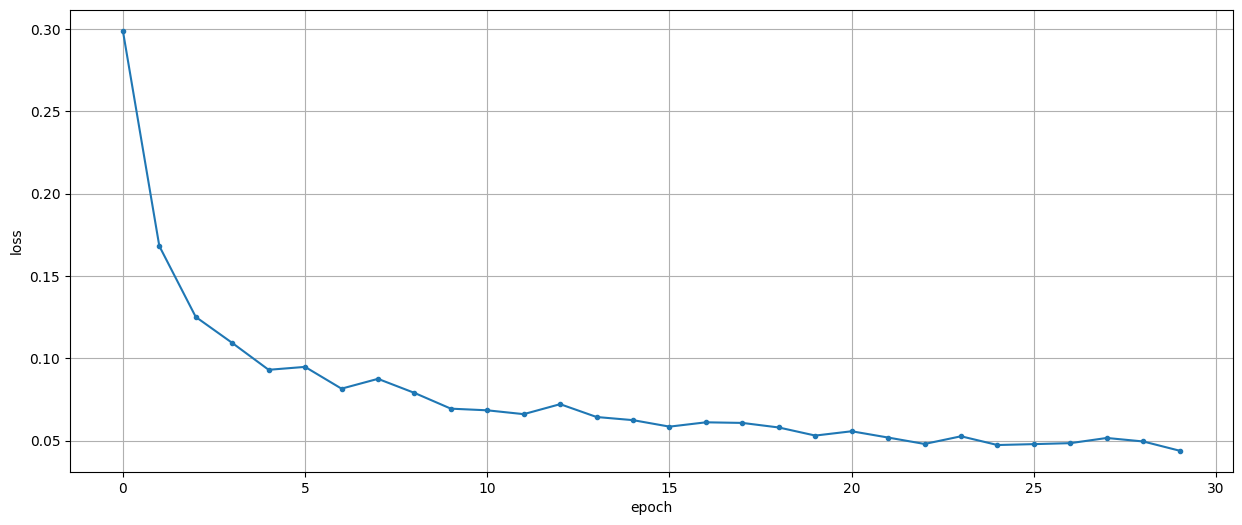

In [91]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

I see that from changing number of neurons after specific value, I don't have too much difference. Even with 1 it's working good enough, more accurate will be near 5-10 